## Breast Cancer Detection Prediction

This is the beginner level classification machine learning project. We explore Logestic Regression algorithm for this project. We will load the data from sklearn Datasets for UCI ML Breast Cancer Wisconsin (Diagnostic). Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

*The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.

Predict if the cancer diagnosis is 'Benig' or 'Malignant' based on the features given below;

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

#### class:
  - WDBC-Malignant
  - WDBC-Benign

* Class distrubution: 212 - Malignant, 357 - Benign
* There are 30 features and 569 instances/datapoints.

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

### Import libraries

In [1]:
#Pandas for datamanipulations and analysis
#Numpy for numeric calculation
#Matplotlib and Seaborn for data visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import breast cancer dataset "load_breast_cancer" from sklearn dataset 
from sklearn.datasets import load_breast_cancer as lbc
cancer_data = lbc()

In [3]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
#Check the datatype of cancer.
#Datatype of cancer data is dictionary but in sklearn it is known as "Bunch".
#Since it is dictionary we can seperate out keys and values
type(cancer_data)

sklearn.utils.Bunch

**Keys**

In [5]:
#Get the keys of cancer_data.
#These keys will gives use info about target,features and feature data. 
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
#Check the cancer_data details using key "DESCR"
print(cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Targets and Features**

In [7]:
#Check the target values using key "target_names"
print(cancer_data.target_names)

['malignant' 'benign']


In [8]:
#Check the feature details (column names) using key "feature_names"
print(cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
#shape
print(cancer_data.feature_names.shape)

(30,)


In [10]:
#Checking the values of all the features/columns
print(cancer_data.data)
print(cancer_data.data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [11]:
#Create dataframe form cancer data
#data is cancer_data.data
#columns are cancer_data.feature_names and target
cancer = pd.DataFrame(data = np.c_[cancer_data.data, cancer_data.target], columns = np.append(cancer_data.feature_names, "target"))
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
#Check all the features
cancer.columns.shape

(31,)

In [13]:

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:

cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
#correlational matrix

cancer_corr = cancer.corr()
cancer_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [16]:
cancer_corr.target.sort_values(ascending = False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [17]:
#Fuction to get features for the given correlational threshold value
def get_features(corr_data,corr_threshold):
    _columns = []
    for index, value in corr_data.abs().items(): 
        if value > corr_threshold:
            _columns.append(index)
    return _columns

In [18]:
#define threshold correlational value  to 0.35 for features
#Create a seperate variable "selected_fetures" to get the array of features/columns whose threshold value more than 0.35
corr_thershold = 0.35
selected_features = get_features(cancer_corr.target, corr_thershold)
selected_features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'concave points error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'target']

In [19]:
#Create a dataframe from the selected features and check the shape of it
cancer = cancer[selected_features].copy()
print(cancer.shape)
list(cancer.columns)

(569, 22)


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'radius error',
 'perimeter error',
 'area error',
 'concave points error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'target']

In [20]:
#Check the target value count using value_counts
cancer.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

### Data Visulaization



<AxesSubplot:xlabel='target', ylabel='count'>

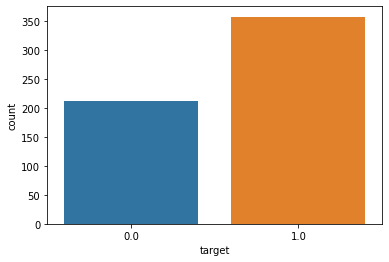

In [21]:
#Visualize the target using countplot
sns.countplot(x = cancer.target, label = "count")

In [22]:
#sns.pairplot(data = cancer, hue = "target")

<AxesSubplot:>

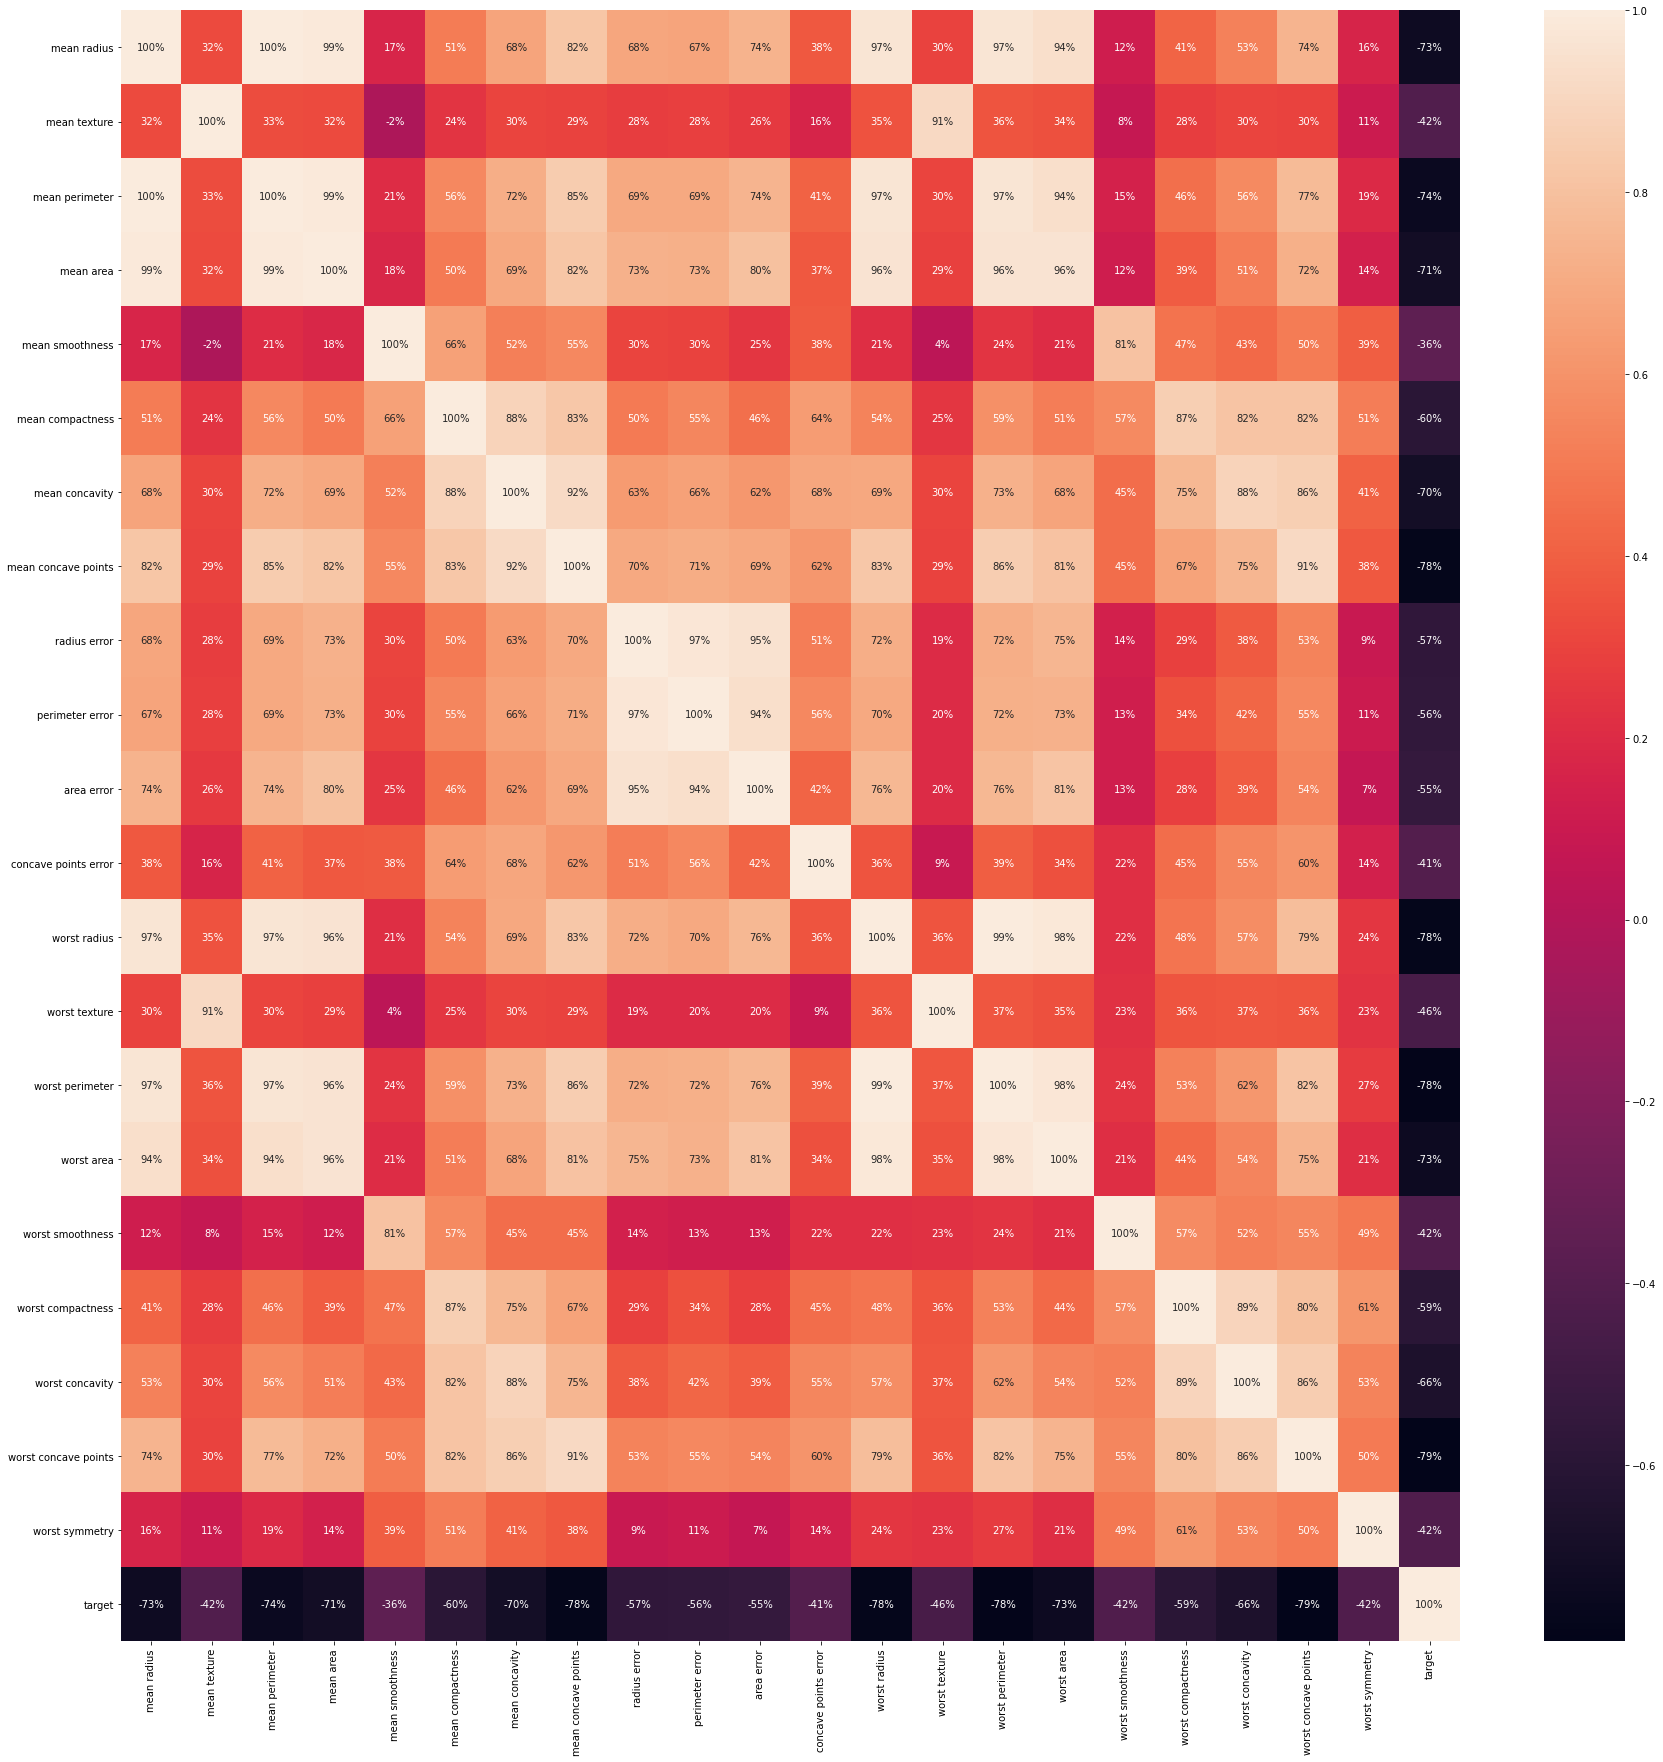

In [23]:
plt.figure(figsize = (30,30))
sns.heatmap(data = cancer.corr(), annot = True, fmt = ".00%")

In [24]:
#Check features pair plots wrt target for selected features only
 

In [25]:
#Visualize the correlation using heatmap


**Model training function**

In [26]:
#Create a model training function with takes X,y values and gives trained model and it's score 
from sklearn.svm import SVC
def modelTraining(X_train,y_train):
    
    svc = SVC(gamma='scale')
    svc.fit(X_train,y_train)
    
    #print the accuracy of the model
    print('SVC training accuracy: ',svc.score(X_train,y_train))
    return svc
    

**Confusion Matrix functions**

In [27]:
#function to print confusion matrix
def print_confusion_matrix(confusion_matrix):
    cm = pd.DataFrame(confusion_matrix,
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Actual Class " + str(class_name) for class_name in [0,1]])
    print(cm)

In [28]:
#Confusion matrix for different models
def print_Confusion_matrix_for_models(confusionMatrix_array, corr_threshold = 0.55):   
        for cm,type_name in confusionMatrix_array:
            print("Type:", type_name, "\tthreshold value:",corr_threshold)
            print_confusion_matrix(cm)
            print('\n')

## Building model

Once the data is ready for our model. We will split data into two part training and testing dataset

**Train Test Split**

In [29]:
#Target
y = cancer.target

#Features
X = cancer.drop("target",axis = 1)

In [30]:
#Train test split using sklearn model_selection
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.3, random_state = 0)

In [31]:
#X_train shape
X_train.shape

(398, 21)

In [32]:
#X_test shape
X_test.shape

(171, 21)

## Model without Feature Scaling

**Train the model**

In [33]:
#Get trained model using modelTraining)(X,y) function
#Get predicted value for target using model.predict()
model =  modelTraining(X_train, y_train)
y_predict = model.predict(X_test)

SVC training accuracy:  0.9045226130653267


**Model Evaluation**

In [34]:
#Declaring variable models_cm_array to get the array of trained models
models_cm_array = []

In [35]:
#importing confusion matrix and classification report library
from sklearn.metrics import classification_report,confusion_matrix

**Confusion matrix**

In [36]:
#Append the confusion matrix value to models_cm_array for later comparison 
cm_NS = confusion_matrix(y_test, y_predict)
models_cm_array.append((cm_NS, "Model without scaling"))

In [37]:
#Print the confusion matrix
print_confusion_matrix(cm_NS)

                Predicted Class 0  Predicted Class 1
Actual Class 0                 51                 12
Actual Class 1                  1                107


**Data Visualisation for Confusion matrix**

<AxesSubplot:>

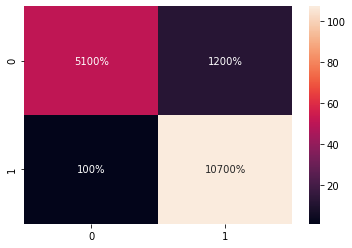

In [38]:
#Heatmap for above confusion matrix
sns.heatmap(cm_NS, annot = True, fmt = ".000%")

**Classification report**

In [39]:
#Print the confusion matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        63
         1.0       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



## Model Improvement

## Feature Scaling

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1

where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:
                            
                            z=(x−μ)/σ

Standardizing the features so that they are centered around 0 with a standard deviation of 1. 

In [40]:
#Import StandardScaler from sklearn preprocessing and get StandardScaler() for normalization
from sklearn.preprocessing import StandardScaler as ssc
sc = ssc()

**Build Scaled Model**

In [41]:
#Fit the train model and transform test model
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [42]:
#Train model using scaled train and test data.
model_sc = modelTraining(X_train_sc, y_train)
y_predict_sc = model_sc.predict(X_test_sc)

SVC training accuracy:  0.9824120603015075


### Model Evaluation

**Confusion Matrix**

In [43]:
#Get confusion matrix and append in to models_cm_array
cm_sc = confusion_matrix(y_test, y_predict_sc)
models_cm_array.append([cm_sc, "Model with scaling"])

In [44]:
#Print Confusion Matrix using print_confusion_matrix
print_confusion_matrix(cm_sc)

                Predicted Class 0  Predicted Class 1
Actual Class 0                 60                  3
Actual Class 1                  3                105


In [45]:
#Print the confusion matrix for all models
print_Confusion_matrix_for_models(models_cm_array,corr_thershold)

Type: Model without scaling 	threshold value: 0.35
                Predicted Class 0  Predicted Class 1
Actual Class 0                 51                 12
Actual Class 1                  1                107


Type: Model with scaling 	threshold value: 0.35
                Predicted Class 0  Predicted Class 1
Actual Class 0                 60                  3
Actual Class 1                  3                105




**Classificaiton Report**

In [46]:
#print classification report
print(classification_report(y_test, y_predict_sc))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        63
         1.0       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Hyperparameter Tunning

In [47]:
#Create a dictionary to get the hyperparameters "C", "gamma" and "kernel"
param_grid = {'C':[0.1,1,10,20,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
param_grid

{'C': [0.1, 1, 10, 20, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

**GridSearchCV**

It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. Exhaustive search over specified parameter values for an estimator. So, the performance of a model significantly depends on the value of hyperparameters.

We pass dictionary of predefined values for hyperparameters to the GridSearchCV function. C, Gamma and Kernels are some of the hyperparameters of an SVM model. 

In [48]:
#Import GridSearchCV from model_selection for gridsearch hyperparameter tunning
#parameters: estimator= SVC(), param_grid = param_grid(defined above) and cv= 5 (crossvalidation)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, refit = True, verbose = 4, cv = 5, return_train_score = True)
grid.fit(X_train_sc, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.626, test=0.625), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.626, test=0.625), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.626, test=0.625), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.624, test=0.633), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.627, test=0.620), total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.962, test=0.950), total=   0.0s
[CV] C=0.1, gamma=0.1, k

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.940, test=0.938), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.937, test=0.962), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.947, test=0.924), total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=(train=0.670, test=0.688), total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=(train=0.692, test=0.662), total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=(train=0.689, test=0.662), total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=(train=0.665, test=0.70

[CV]  C=20, gamma=0.01, kernel=rbf, score=(train=0.981, test=0.988), total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV]  C=20, gamma=0.01, kernel=rbf, score=(train=0.994, test=0.938), total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV]  C=20, gamma=0.01, kernel=rbf, score=(train=0.987, test=0.963), total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV]  C=20, gamma=0.01, kernel=rbf, score=(train=0.981, test=0.987), total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV]  C=20, gamma=0.01, kernel=rbf, score=(train=0.981, test=1.000), total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV]  C=20, gamma=0.001, kernel=rbf, score=(train=0.975, test=0.988), total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV]  C=20, gamma=0.001, kernel=rbf, score=(train=0.981, test=0.950), total

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 20, 100],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             return_train_score=True, verbose=4)

In [49]:
#Create the dataframe with grid.cv_results_
cv_df = pd.DataFrame(grid.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009311,0.000242,0.002400,0.000199,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.6250,0.6250,...,0.625633,0.004077,20,0.625786,0.625786,0.625786,0.623824,0.626959,0.625628,0.001010
1,0.006212,0.000684,0.001704,0.000249,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.9500,0.9375,...,0.954873,0.016807,10,0.962264,0.962264,0.968553,0.959248,0.962382,0.962942,0.003045
2,0.005604,0.000583,0.001902,0.000490,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.9375,0.9250,...,0.937215,0.013698,13,0.937107,0.943396,0.940252,0.937304,0.946708,0.940953,0.003680
3,0.007105,0.000374,0.001801,0.000245,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.6875,0.6625,...,0.678449,0.017735,19,0.669811,0.691824,0.688679,0.664577,0.689655,0.680909,0.011366
4,0.011611,0.001495,0.002198,0.000394,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.7750,0.7750,...,0.768766,0.018092,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


**Mean Score for train and test for the different set of hyperparameter** 

In [50]:
#Creating a dataframe using following columns 'param_C','param_gamma','param_kernel','mean_train_score','mean_test_score'
#Sort values wrt 'mean_test_score' and 'mean_train_score'
cv_df_req = cv_df[['param_C','param_gamma','param_kernel','mean_train_score','mean_test_score']]
cv_df_req.sort_values(['mean_test_score', 'mean_train_score'], ascending = False).head()

,param_C,param_gamma,param_kernel,mean_train_score,mean_test_score
19,100,0.001,rbf,0.985558,0.977468
10,10,0.01,rbf,0.984931,0.977468
15,20,0.001,rbf,0.976136,0.977437
14,20,0.01,rbf,0.984929,0.974968
18,100,0.01,rbf,0.988697,0.969968


In [51]:
#Best score for the grid
grid.best_score_

0.9774683544303798

In [52]:
#Parameters with the best score using best_params_
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [53]:
#Get the best_estimator (model) with the best params
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [54]:
#Get predicted value using grid.predict()
grid_predict = grid.predict(X_test_sc)

In [55]:
#Get confusion matrix
#Append confusion matrix to models_cm_array
#print confusion matrix using print_confusion_matrix()


**Print Confusion matrix for all the models**

In [56]:
#Print confusion matrix for all the models
cm_grid = confusion_matrix(y_test, grid_predict)
models_cm_array.append((cm_grid, "model with grid search optimization"))
print_confusion_matrix(cm_grid)

                Predicted Class 0  Predicted Class 1
Actual Class 0                 61                  2
Actual Class 1                  1                107


In [57]:
print_Confusion_matrix_for_models(models_cm_array)

Type: Model without scaling 	threshold value: 0.55
                Predicted Class 0  Predicted Class 1
Actual Class 0                 51                 12
Actual Class 1                  1                107


Type: Model with scaling 	threshold value: 0.55
                Predicted Class 0  Predicted Class 1
Actual Class 0                 60                  3
Actual Class 1                  3                105


Type: model with grid search optimization 	threshold value: 0.55
                Predicted Class 0  Predicted Class 1
Actual Class 0                 61                  2
Actual Class 1                  1                107


